# plot spectrumgram at 512*512

In [10]:
import numpy as np
from scipy import signal
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

In [51]:
file_path = 'my_device_2020_02_25_11_56_36.dat'
fs = 56e6
with open(file_path, 'rb') as f:
    raw = np.fromfile(f, dtype=np.int16)
data = raw[0::2] + 1j*raw[1::2]
totla_len = 512 * 20 * 512
data = data[4018:4018 + totla_len]

total_time = len(data) / fs
total_time * 1000

93.62285714285714

In [64]:
nfft = 512
freq, t, Sxx = signal.spectrogram(data, nperseg=nfft, nfft=nfft, noverlap=0, fs=fs, return_onesided=False)
Sxx.shape

(512, 10240)

In [65]:
deci = 20
pxx = 10 * np.log10(Sxx[:, ::deci])
pxx.shape

(512, 512)

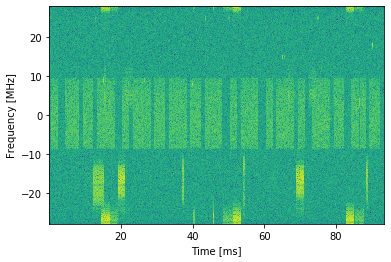

In [66]:
txx = t[::deci]
plt.pcolormesh(txx * 1000, fftshift(freq / 1e6), fftshift(pxx, axes=0))
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [ms]')
plt.show()

In [62]:
type(f)

numpy.ndarray